## Dispatch problem with German SciGRID network

In [3]:
n = pypsa.examples.scigrid_de(from_master=True)

INFO:pypsa.io:Imported network scigrid-de.nc has buses, carriers, generators, lines, loads, storage_units, transformers


In [4]:
n.lines.s_max_pu = 0.7
n.lines.loc[["316", "527", "602"], "s_nom"] = 1715

In [5]:
n.snapshots

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               '2011-01-01 10:00:00', '2011-01-01 11:00:00',
               '2011-01-01 12:00:00', '2011-01-01 13:00:00',
               '2011-01-01 14:00:00', '2011-01-01 15:00:00',
               '2011-01-01 16:00:00', '2011-01-01 17:00:00',
               '2011-01-01 18:00:00', '2011-01-01 19:00:00',
               '2011-01-01 20:00:00', '2011-01-01 21:00:00',
               '2011-01-01 22:00:00', '2011-01-01 23:00:00'],
              dtype='datetime64[ns]', name='snapshot', freq=None)

In [6]:
n.loads_t.p_set.head(3)

Load,1,3,4,6,7,8,9,11,14,16,...,382_220kV,384_220kV,385_220kV,391_220kV,403_220kV,404_220kV,413_220kV,421_220kV,450_220kV,458_220kV
snapshot,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,231.716206,40.613618,66.790442,196.124424,147.804142,123.671946,83.637404,73.280624,175.260369,298.900165,...,202.010114,222.695091,212.621816,77.570241,16.148970,0.092794,58.427056,67.013686,38.449243,66.752618
2011-01-01 01:00:00,221.822547,38.879526,63.938670,187.750439,141.493303,118.391487,80.066312,70.151738,167.777223,286.137932,...,193.384825,213.186609,203.543436,74.258201,15.459452,0.088831,55.932378,64.152382,36.807564,63.902460
2011-01-01 02:00:00,213.127360,37.355494,61.432348,180.390839,135.946929,113.750678,76.927805,67.401871,161.200550,274.921657,...,185.804364,204.829941,195.564769,71.347365,14.853460,0.085349,53.739893,61.637683,35.364750,61.397558


<Axes: xlabel='snapshot', ylabel='MW'>

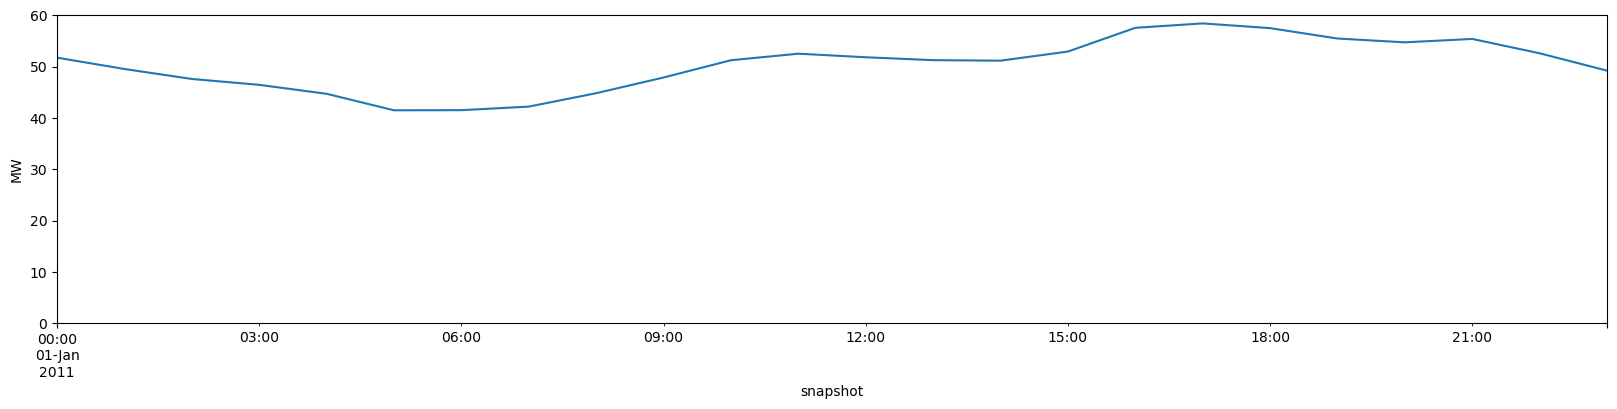

In [26]:
n.loads_t.p_set.sum(axis=1).div(1e3).plot(ylim=[0, 60], ylabel="MW", figsize=(20,4))

<Axes: xlabel='snapshot', ylabel='p.u.'>

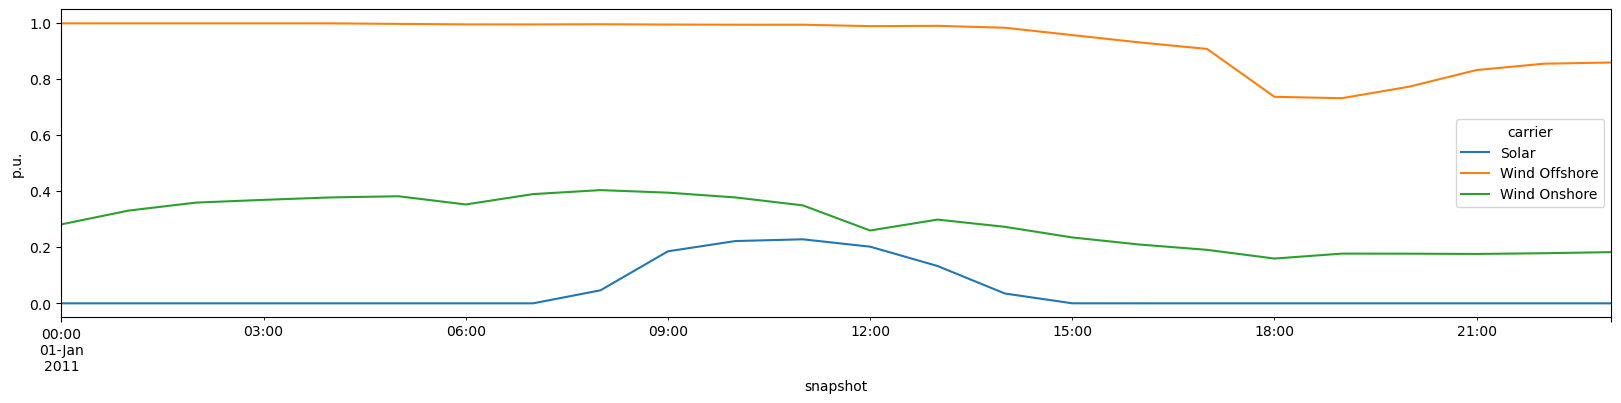

In [27]:
n.generators_t.p_max_pu.T.groupby(n.generators.carrier).mean().T.plot(ylabel="p.u.", figsize=(20,4))

Text(0.5, 0, 'GW')

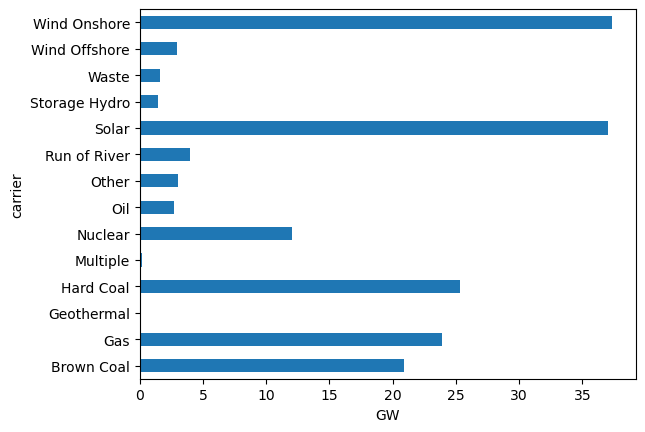

In [14]:
n.generators.groupby("carrier").p_nom.sum().div(1e3).plot.barh()
plt.xlabel("GW")

In [28]:
load = n.loads_t.p_set.sum(axis=0).groupby(n.loads.bus).sum()

C:\Users\Shahzaib Khan\miniconda3\envs\energy\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".



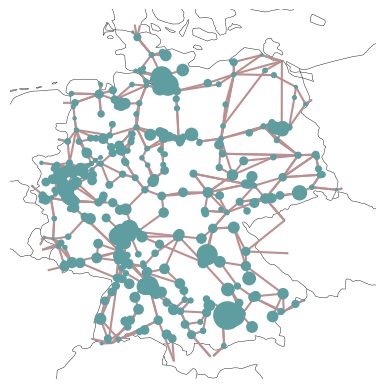

In [29]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())

n.plot(
    ax=ax,
    bus_sizes=load / 2e5,
);

... and power plant capacities:

In [30]:
capacities = n.generators.groupby(["bus", "carrier"]).p_nom.sum()

In [11]:
import random

carriers = list(n.generators.carrier.unique()) + list(n.storage_units.carrier.unique())
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in carriers]
n.add("Carrier", carriers, color=colors, overwrite=True)

Index(['Gas', 'Hard Coal', 'Run of River', 'Waste', 'Brown Coal', 'Oil',
       'Storage Hydro', 'Other', 'Multiple', 'Nuclear', 'Geothermal',
       'Wind Offshore', 'Wind Onshore', 'Solar', 'Pumped Hydro'],
      dtype='object')

C:\Users\Shahzaib Khan\miniconda3\envs\energy\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".



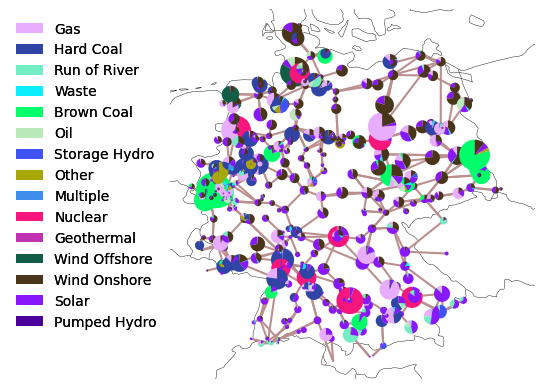

In [15]:
from pypsa.plot import add_legend_patches

fig = plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())

n.plot(
    ax=ax,
    bus_sizes=capacities / 2e4,
)

add_legend_patches(
    ax, colors, carriers, legend_kw=dict(frameon=False, bbox_to_anchor=(0, 1))
)

In [16]:
n.storage_units.head(3)

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,...,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge,cyclic_state_of_charge_per_period,max_hours,efficiency_store,efficiency_dispatch,standing_loss,inflow,p_nom_opt
StorageUnit,,,,,,,,,,,,,,,,,,,,,
100_220kV Pumped Hydro,100_220kV,PQ,,144.5,0.0,False,0.0,inf,-1.0,1.0,...,False,NaN,False,True,6.0,0.95,0.95,0.0,0.0,0.0
114 Pumped Hydro,114,PQ,,138.0,0.0,False,0.0,inf,-1.0,1.0,...,False,NaN,False,True,6.0,0.95,0.95,0.0,0.0,0.0
121 Pumped Hydro,121,PQ,,238.0,0.0,False,0.0,inf,-1.0,1.0,...,False,NaN,False,True,6.0,0.95,0.95,0.0,0.0,0.0


In [17]:
n.optimize(solver_name="highs")

Index(['2', '5', '10', '12', '13', '15', '18', '20', '22', '24', '26', '30',
       '32', '37', '42', '46', '52', '56', '61', '68', '69', '74', '78', '86',
       '87', '94', '95', '96', '99', '100', '104', '105', '106', '107', '117',
       '120', '123', '124', '125', '128', '129', '138', '143', '156', '157',
       '159', '160', '165', '184', '191', '195', '201', '220', '231', '232',
       '233', '236', '247', '248', '250', '251', '252', '261', '263', '264',
       '267', '272', '279', '281', '282', '292', '303', '307', '308', '312',
       '315', '317', '322', '332', '334', '336', '338', '351', '353', '360',
       '362', '382', '384', '385', '391', '403', '404', '413', '421', '450',
       '458'],
      dtype='object', name='Transformer')
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 25.98it/s]
INFO:linopy.io: Writing time: 2.09s
INFO

('ok', 'optimal')

In [18]:
line_loading = n.lines_t.p0.iloc[0].abs() / n.lines.s_nom / n.lines.s_max_pu * 100  # %

In [19]:
norm = plt.Normalize(vmin=0, vmax=100)

C:\Users\Shahzaib Khan\miniconda3\envs\energy\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".



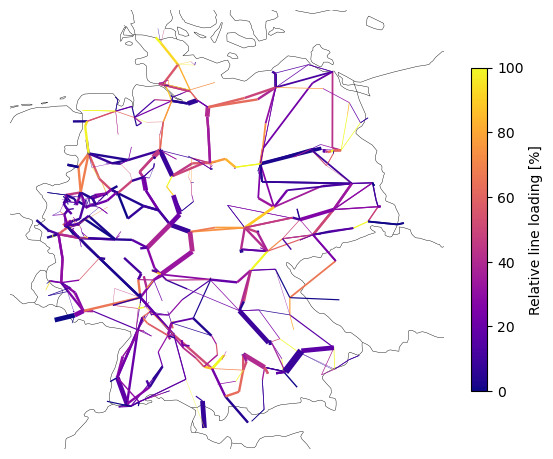

In [20]:
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection=ccrs.EqualEarth())

n.plot(
    ax=ax,
    bus_sizes=0,
    line_colors=line_loading,
    line_norm=norm,
    line_cmap="plasma",
    line_widths=n.lines.s_nom / 1000,
)

plt.colorbar(
    plt.cm.ScalarMappable(cmap="plasma", norm=norm),
    ax=ax,
    label="Relative line loading [%]",
    shrink=0.6,
)

In [21]:
p_by_carrier = n.generators_t.p.T.groupby(n.generators.carrier).sum().T.div(1e3)

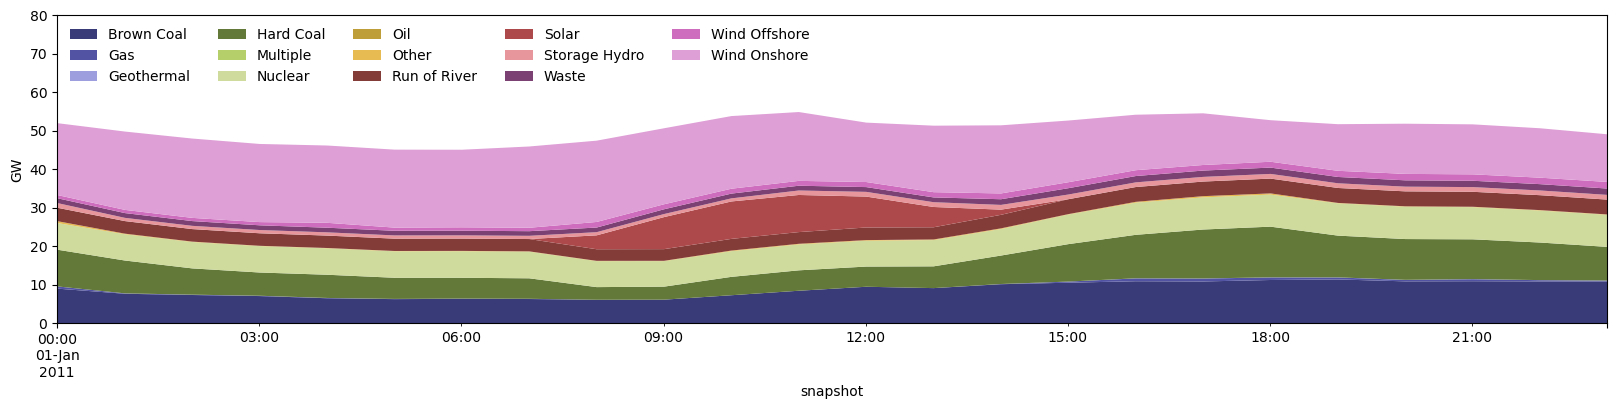

In [31]:
fig, ax = plt.subplots(figsize=(20, 4))

p_by_carrier.plot(
    kind="area",
    ax=ax,
    linewidth=0,
    cmap="tab20b",
)

ax.legend(ncol=5, loc="upper left", frameon=False)

ax.set_ylabel("GW")

ax.set_ylim(0, 80);

Text(0, 0.5, 'MWh or MW')

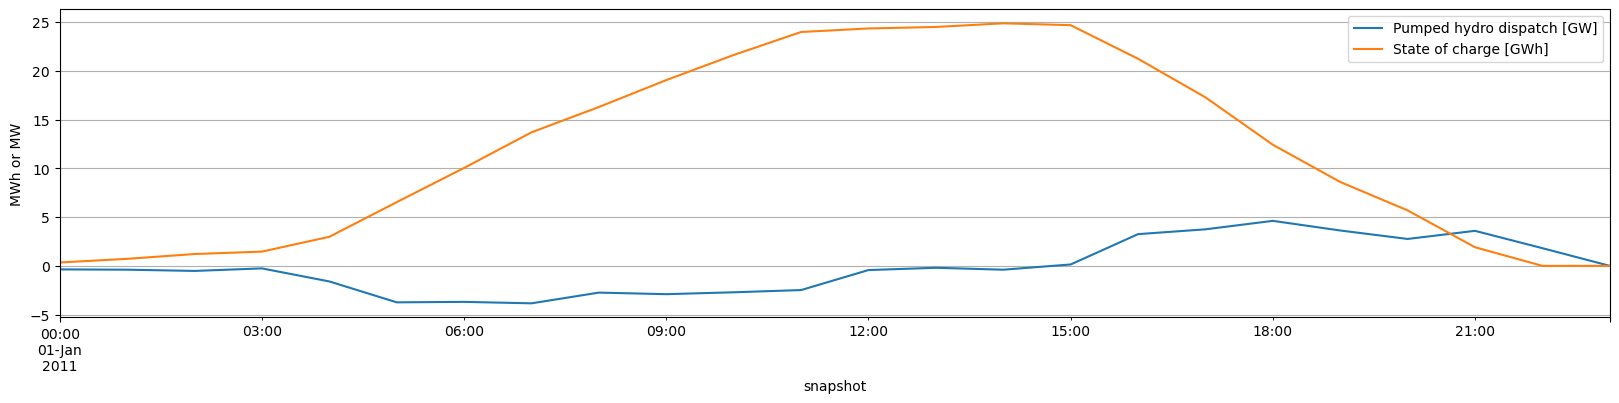

In [32]:
fig, ax = plt.subplots(figsize=(20,4))

p_storage = n.storage_units_t.p.sum(axis=1).div(1e3)
state_of_charge = n.storage_units_t.state_of_charge.sum(axis=1).div(1e3)

p_storage.plot(label="Pumped hydro dispatch [GW]", ax=ax)
state_of_charge.plot(label="State of charge [GWh]", ax=ax)

ax.grid()
ax.legend()
ax.set_ylabel("MWh or MW")

C:\Users\Shahzaib Khan\miniconda3\envs\energy\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".



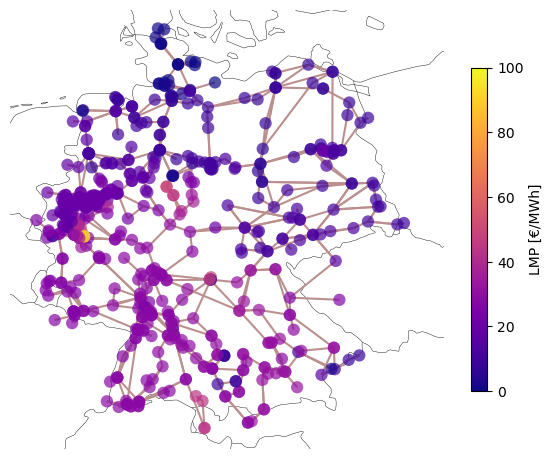

In [24]:
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection=ccrs.EqualEarth())

norm = plt.Normalize(vmin=0, vmax=100)  # €/MWh

n.plot(
    ax=ax,
    bus_colors=n.buses_t.marginal_price.mean(),
    bus_cmap="plasma",
    bus_norm=norm,
    bus_alpha=0.7,
)

plt.colorbar(
    plt.cm.ScalarMappable(cmap="plasma", norm=norm),
    ax=ax,
    label="LMP [€/MWh]",
    shrink=0.6,
)